# I. Getting the Dataset

In [1]:
# #!/bin/bash
# mkdir -p ./ds/
# curl -L -o ./ds/7k-books-with-metadata.zip https://www.kaggle.com/api/v1/datasets/download/dylanjcastillo/7k-books-with-metadata

In [9]:
import pandas as pd

In [10]:
books = pd.read_csv("./ds/books.csv")
books.sample(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
6499,9781841150505,1841150509,The Patron Saint of Liars,NaN,Ann Patchett,Catholic women,http://books.google.com/books/content?id=b2xpE...,Roman.,2003.0,3.79,352.0,24030.0
6452,9781596792371,159679237X,A Christmas Carol,NaN,Charles Dickens,Juvenile Fiction,http://books.google.com/books/content?id=A8D33...,A miser learns the true meaning of Christmas w...,2005.0,4.34,238.0,431.0
5628,9780965762649,0965762645,Reefer madness,"sex, drugs, and cheap labor in the American bl...",Eric Schlosser,Black market,http://books.google.com/books/content?id=o9JZK...,"Reports on America's ""shadow"" economy of illeg...",2003.0,3.77,310.0,125.0
3479,9780553382044,0553382047,Last of the Amazons,NaN,Steven Pressfield,Fiction,http://books.google.com/books/content?id=AflvD...,"From the ""New York Times"" bestselling author o...",2003.0,3.75,400.0,2083.0
5854,9781406922905,1406922900,"The Pronouncing Reading Book for Children, Wit...",NaN,William L Robinson,History,http://books.google.com/books/content?id=gyiJy...,This is a reproduction of the original artefac...,2019.0,3.66,92.0,2477.0


# 1. EDA

## 1.1 Checking if there are null values in the DS

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [12]:
# null_counts = books.isnull().sum()
# null_counts
# null_percent = (null_counts / len(books)) * 100

#or
null_percent = books.isnull().mean() * 100
null_percent.to_frame().T

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,0.0,0.0,0.0,65.036711,1.057269,1.453744,4.831131,3.847283,0.088106,0.631424,0.631424,0.631424


In [13]:
unique_counts = books.nunique().to_frame().T
unique_counts

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,6810,6810,6398,2009,3780,567,6481,6474,94,200,915,3881


### What we are concerned about:
- a lot of subtitles are missing, approx 2/3 of total `which needs to be handled (removed or used)`
- too many categories, but `we might still want to use the category names as they might have valuable information`
- only 4% descriptions missing which is okay, but ` we want to check if the missing of description isn't biased`

> it is important to check if missing values have some pattern as it can imply some sort of bias.

## 1.2 Further investigating missing values

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

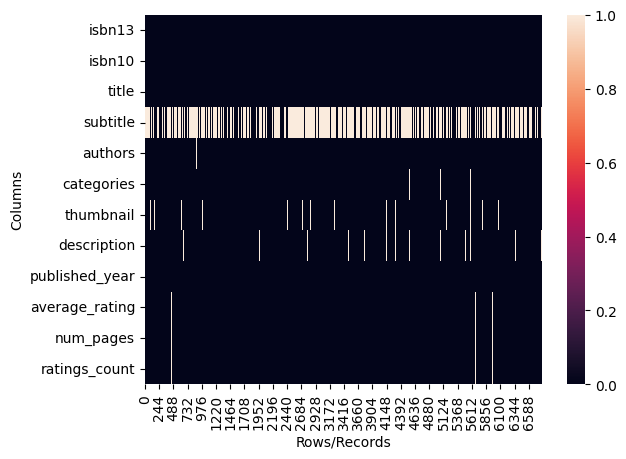

In [15]:

ax = plt.axes()
sns.heatmap(books.isna().T, cbar=True, ax =ax)
plt.xlabel("Rows/Records")
plt.ylabel("Columns")
plt.show()

### Conclusion:
- for the last three columns, when one value is missing, all of the values are missing. it could mean, the records were added from other smaller dataset that didn't contain those columns

## 1.3 Checking the correlation between missing description and other colums (like age, rating, number of pages)

In [16]:
import numpy as np

In [24]:

books["missing_description"] = np.where(books["description"].isnull(), 1, 0)
books["age"] = 2025 - books["published_year"]

In [25]:
cols_of_interest = ["missing_description", "age", "num_pages", "average_rating"]

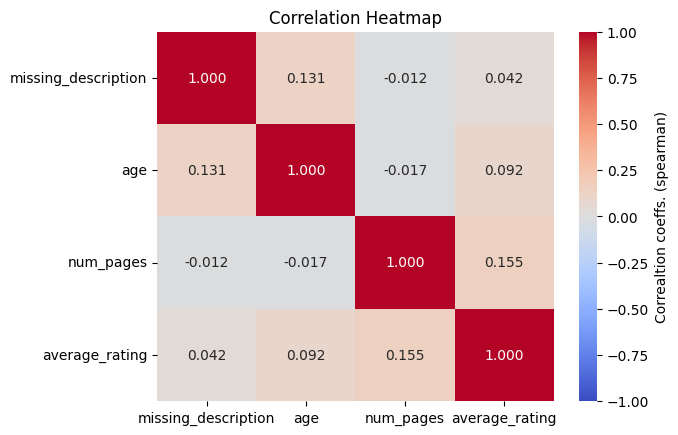

In [30]:
correlation_matrix = books[cols_of_interest].corr("spearman")
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"label": "Correaltion coeffs. (spearman)"})
heatmap.set_title("Correlation Heatmap")
plt.show()